<a href="https://colab.research.google.com/github/charlyaugustus/Charlyaugustusrepo/blob/main/clase_42_algoritmos_de_clasificacion_y_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en dr
#import os
#print(os.getcwd())
#os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive


# Clasificacion con SVC

In [ ]:
# importar librerias necesarias (np,pd,plt)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importar modulos de sklearn (SVC,train_test_split,accuracy_score)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Cargamos los datos!
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/ESL.mixture.csv'

#usar pandas para la carga en un dataframe
df = pd.read_csv(url)
df.head()

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


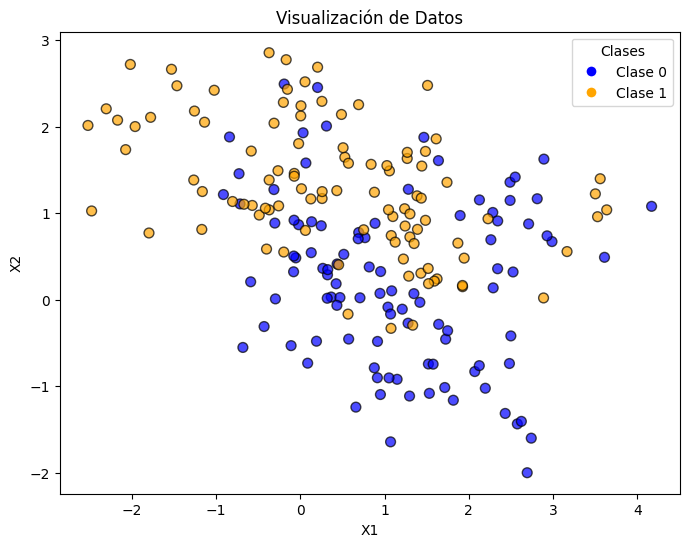

In [ ]:
#visualizacion

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot con colores específicos para cada clase
colors = np.where(df['y'] == 0, 'blue', 'orange')
scatter = ax.scatter(df['X1'], df['X2'], c=colors, edgecolor='k', s=50, alpha=0.7)

# Etiquetas de ejes
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# Título
ax.set_title('Visualización de Datos')

# Leyenda
legend_labels = {0: 'Clase 0', 1: 'Clase 1'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label) for color, label in zip(['blue', 'orange'], [legend_labels[i] for i in df['y'].unique()])]
ax.legend(handles=handles, title='Clases')

# Mostrar la trama
plt.show()

In [ ]:
# División de los datos en train y test
# seleccionamos primero los valores de X e y
X=df[["X1","X2"]]
y=df["y"]
# aplicamos train test split en nuestros datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# creamos nuestro modelo de SVM (svc): https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
model = SVC(gamma='auto',kernel='rbf')
#entrenamos el modelo
model.fit(X_train,y_train)

SVC(gamma='auto')

In [ ]:
X_test.head()

,X1,X2
95,0.434501,-0.064545
15,1.279560,-0.271033
30,2.988126,0.672351
158,0.508118,1.757232
128,-1.136539,2.052686


In [ ]:
# Generamos nuestras predicciones
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
#Calculo del accuracy en Test
accuracy_score(y_test, y_pred)

0.8

# Regresion con LinearRegression

In [ ]:
#importar modulos de sklearn para regresion
from sklearn.linear_model import LinearRegression


In [ ]:
# importamos los datos de student_scores
df = pd.read_csv("/content/student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


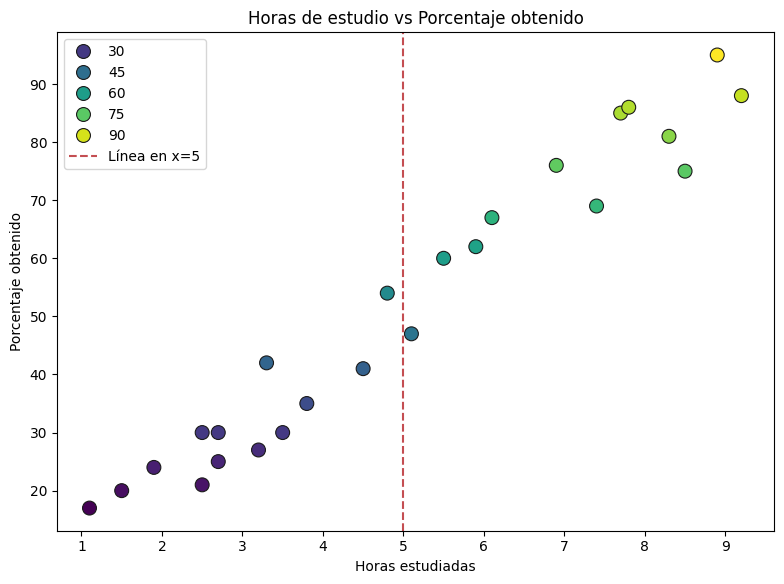

In [ ]:
# visualizamos

import seaborn as sns

# Ploteamos el dataset con seaborn para mejorar la estética
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Hours', y='Scores', hue='Scores', palette='viridis', edgecolor='k', s=100)
plt.title('Horas de estudio vs Porcentaje obtenido')
plt.xlabel('Horas estudiadas')
plt.ylabel('Porcentaje obtenido')

# Agregamos una línea vertical en x=5 con etiqueta
plt.axvline(x=5, color='r', linestyle='--', label='Línea en x=5')

# Añadimos la leyenda
plt.legend()

# Ajustamos el diseño
sns.set(style="whitegrid")
plt.tight_layout()

# Mostramos la trama
plt.show()

In [ ]:
# División de los datos en train y test
# seleccionamos primero los valores de X e y
X=df.iloc[:, :-1].values
y=df.iloc[:, 1].values

# aplicamos train test split en nuestros datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
# instanciamos el modelo de regresion lineal y lo ajustamos
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Recuperamos la intersección y la pendiente(.intercept_ y .coef_)
model.intercept_

2.794196676599803

In [ ]:
#Hacemos nuestras predicciones usando X e y test
model.coef_

array([9.71054094])

# Regresion lineal multiple

In [ ]:
# importamos los datos de petrol_consumption
df = pd.read_csv("/content/petrol_consumption.csv")

In [ ]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
# separamos en X e y
X= df.iloc[:, :-1].values
y= df.iloc[:, 1].values

# aplicamos train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Entrenamiento del modelo(mismo que el regresion lineal simple)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Realizando las predicciones
model.intercept_

-7.275957614183426e-12

In [ ]:
model.coef_

array([ 6.14046204e-13,  1.00000000e+00,  1.11022302e-16, -3.50058312e-13])

In [ ]:
# Realiza la predicción
predictions = model.predict(X_test)
predictions

array([3846., 4449., 3448., 3745., 4574., 3897., 4817., 4341., 4399.,
       3721., 4447., 4870., 5319., 4345., 3357.])